<a href="https://colab.research.google.com/github/Utsav-J/experience-at-ngai/blob/main/Wine_Quality_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir  -p ~/.kaggle

In [2]:
!cp kaggle.json ~/.kaggle

In [3]:
! kaggle datasets download -d yasserh/wine-quality-dataset

  0% 0.00/21.5k [00:00<?, ?B/s]
100% 21.5k/21.5k [00:00<00:00, 44.1MB/s]


In [4]:
! chmod 600 /root/.kaggle/kaggle.json

In [5]:
from zipfile import ZipFile
zip_location = "wine-quality-dataset.zip"
extract_location = "/content"
zip_ref = ZipFile(zip_location)
zip_ref.extractall(extract_location)
zip_ref.close()
del zip_location
del extract_location

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [7]:
data = pd.read_csv("WineQT.csv")

In [8]:
data.head()
len(data.columns)

13

In [ ]:
data.head()

# **BASIC VISUALIZATION**

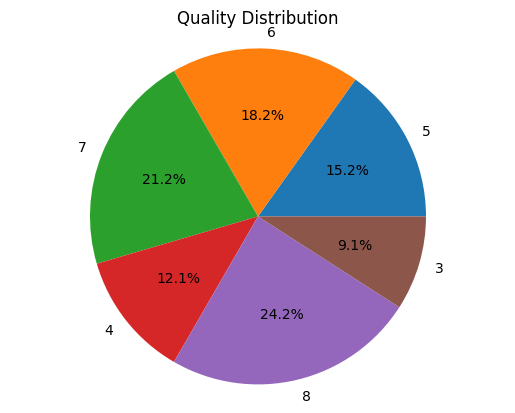

In [10]:
quality_pie = plt.pie(data= data['quality'].value_counts(),
                      x = data['quality'].value_counts().index,
                      labels = data['quality'].value_counts().index,
                      autopct = '%1.1f%%')
plt.axis('equal')
plt.title("Quality Distribution")

plt.show()

## **CREATING GROUPS OF QUALITIES**

In [ ]:
# in laymaan terms, this one will show:
# for quality 5 wines, what is the value of all those parameters?
# mean values are taken in consideration
quality_groups= data.groupby('quality').mean()
quality_groups

<Axes: xlabel='quality'>

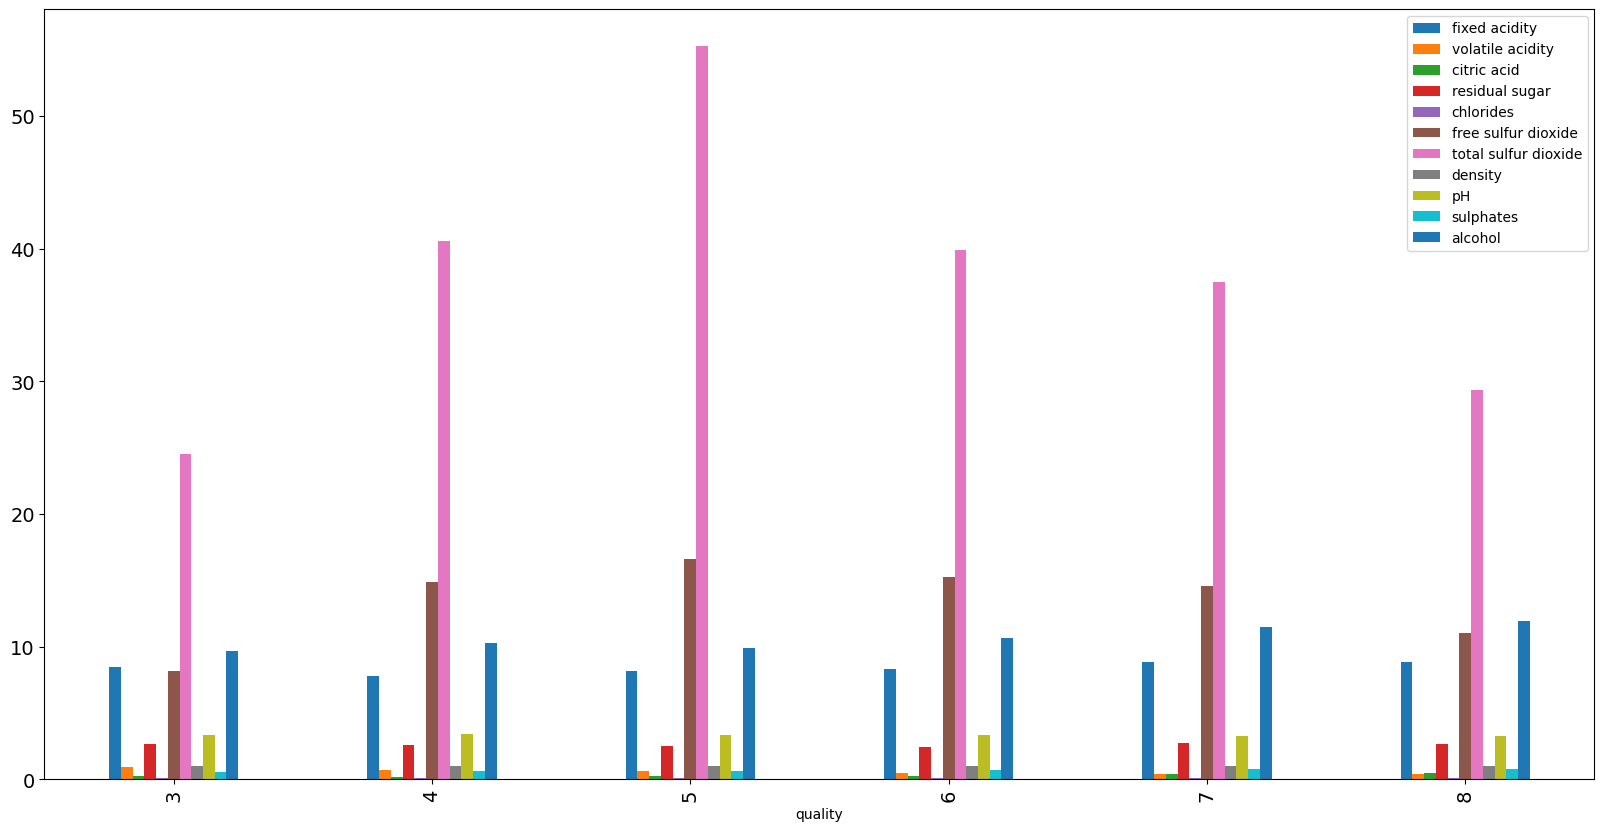

In [25]:
quality_groups.plot(kind = 'bar',figsize = (20,10),fontsize = 14)

# **TRYNA SEE EFFECTS OF EACH PARAMETERS**

In [ ]:
# do this to understand what happened in the loop
for c in data.columns:
  print(c, type(c))


Text(0.5, 1.0, 'Effect of each parameter on Wine Quality')

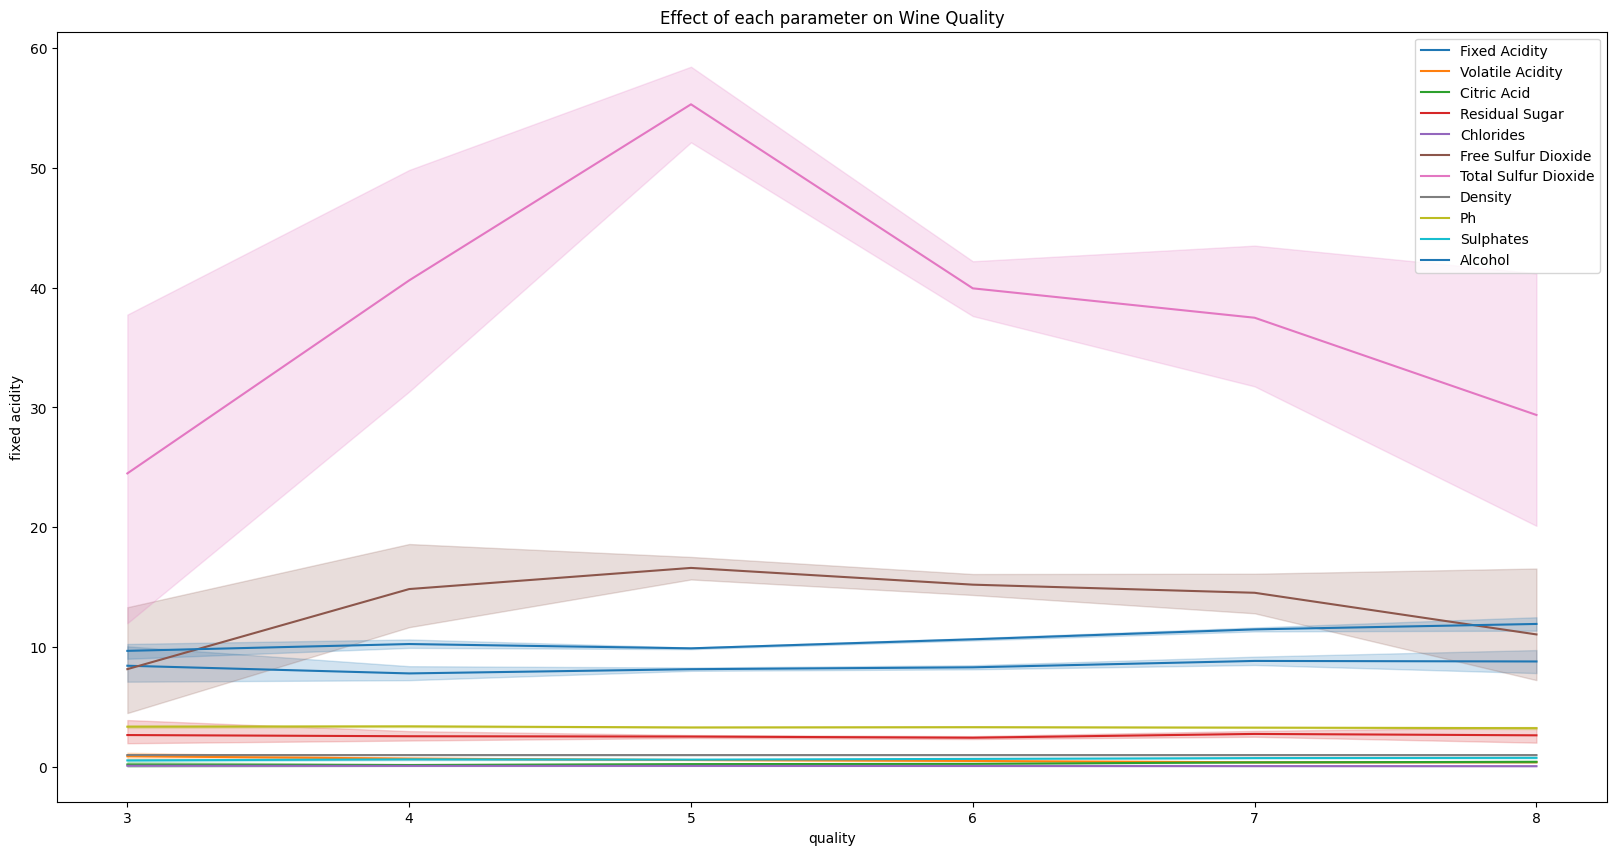

In [37]:
plt.figure(figsize = (20,10))
for c in data.columns:
  if (c!='quality'):
    sbn.lineplot(data = data, x = 'quality',y = c, label = c.title())
plt.title("Effect of each parameter on Wine Quality")


# **INTERACTIVE PLOTS**

In [39]:
import plotly.express as px

In [44]:
px.scatter(data, x = 'free sulfur dioxide',
           y = 'total sulfur dioxide',
           animation_frame = 'quality',)

# **RIDGE REGRESSION**

In [11]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
data.set_index('Id',inplace = True)
data.head()

In [ ]:
x = data.iloc[:,:-1]
y = data['quality']
ridge = Ridge()
parameters = {"alpha": [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

In [14]:
print(f'{np.round(ridge_regressor.best_score_,5)} was the best scored obtained.\nFull:{ridge_regressor.best_score_}')

-0.42584 was the best scored obtained.
Full:-0.42583931195406943


# **LASSO REGRESSION**

In [ ]:
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso,parameters,scoring  =  'neg_mean_squared_error',cv = 5)
lasso_regressor.fit(x,y)

In [16]:
print(f"{np.round(lasso_regressor.best_score_,5)} was obtained as the best score.\nFull: {lasso_regressor.best_score_}")

-0.42625 was obtained as the best score.
Full: -0.4262483869485937


Ridge was found to be better in this case:


1.   Ridge score: -0.42584
2.   Lasso score: -0.42625



In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5,random_state = 0)


In [18]:
ridge_pred = ridge_regressor.predict(x_test)
lasso_pred = lasso_regressor.predict(x_test)

# **PLOTTING THE RESULTS**

In [19]:
import seaborn as sbn

<ipython-input-20-a6de93f72cbd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(y_test-lasso_pred)


<Axes: xlabel='quality', ylabel='Density'>

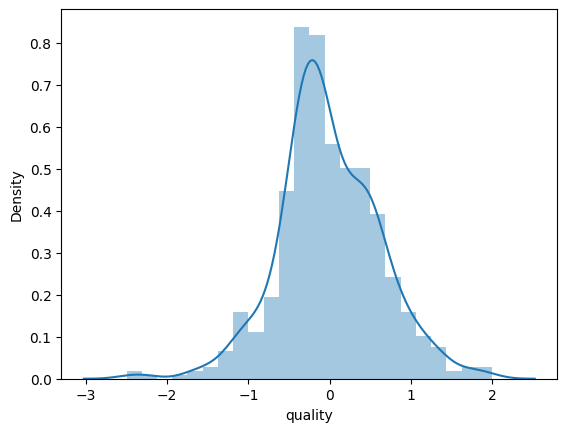

In [20]:
sbn.distplot(y_test-lasso_pred)

<ipython-input-21-054b50d22a0b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(y_test-ridge_pred)


<Axes: xlabel='quality', ylabel='Density'>

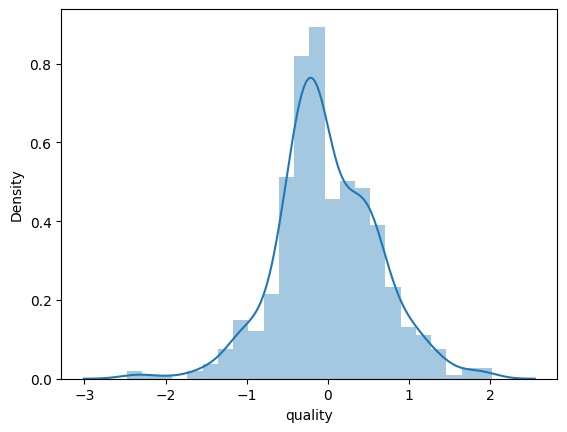

In [21]:
sbn.distplot(y_test-ridge_pred)

# **SUPPORT VECTOR MACHINES**

**Classification**

In [51]:
from sklearn.svm import SVC,SVR
from sklearn.metrics import accuracy_score,mean_squared_error

In [48]:
classifier = SVC(C = 100, kernel = 'rbf')
classifier.fit(x_train,y_train)
predicted_y = classifier.predict(x_test)
print(f"The score on training data with training quality is: {classifier.score(x_train,y_train)} ")
print(f"The score on testing data with testing quality is: {classifier.score(x_test,y_test)}")
print(f"The model evaluation score is: {accuracy_score(y_test,predicted_y)}")

The score on training data with training quality is: 0.5989492119089317 
The score on testing data with testing quality is: 0.5909090909090909
The model evaluation score is: 0.5909090909090909


**Regression**

In [52]:
sv_regressor = SVR(degree = 1,
                   coef0 = 1,
                   tol = 0.001,
                   C = 1.5,
                   epsilon = 0.001)
sv_regressor.fit(x_train,y_train)
predicted_y_reg = sv_regressor.predict(x_test)

print(f"Score on training data with training quality: {sv_regressor.score(x_train,y_train)}")
print(f"Score on testing data with testing quality: {sv_regressor.score(x_test,y_test)}")
print(f"Model accuracy score: {mean_squared_error(y_test ,  predicted_y_reg)}")

Score on training data with training quality: 0.09408249457859985
Score on testing data with testing quality: 0.08849784256916826
Model accuracy score: 0.5838217229989163


# **Decision Trees**

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor

In [56]:
tree_model =  DecisionTreeClassifier(max_depth = 50)
tree_model.fit(x_train,y_train)
print(f'Score on training data with training quality: {tree_model.score(x_train,y_train)}')
print(f"Score on testing data with testing quality: {tree_model.score(x_test,y_test)}")
print(f"The important features were: {tree_model.feature_importances_}")

Score on training data with training quality: 1.0
Score on testing data with testing quality: 0.527972027972028
The important features were: [0.10712959 0.10017681 0.08385599 0.08317699 0.11994082 0.0359213
 0.06799357 0.07372157 0.05196486 0.10817768 0.16794081]


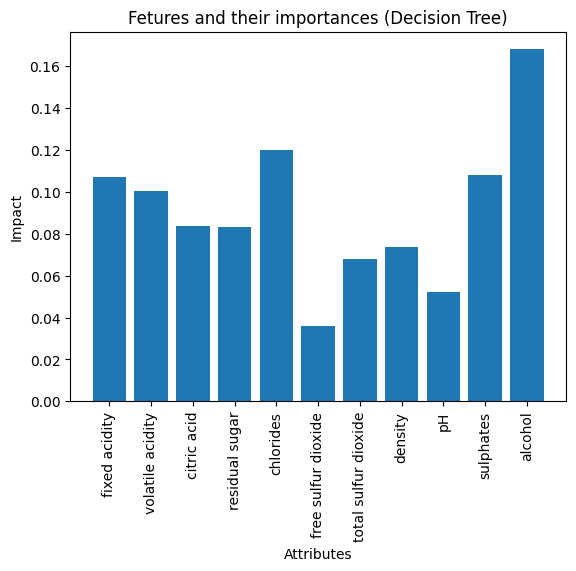

In [72]:
plt.bar(data.columns[:-1],tree_model.feature_importances_ )
plt.title("Fetures and their importances (Decision Tree)")
plt.xlabel('Attributes')
plt.ylabel("Impact")
plt.xticks(rotation = 90)
plt.show()